# Linear perceptron 

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 1. Generate a dataset

dimensions de X: (100, 2)
dimensions de y: (100, 1)


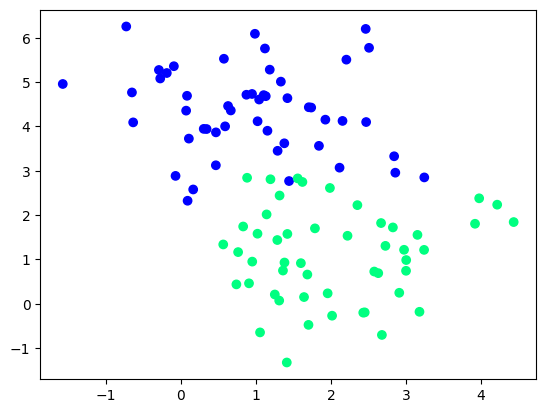

In [43]:
# A dataset with 300 observations and 2 variables (features) x1 and x2 (petal length, petal width)
# Objective : train a model to discriminate between two types of flowers y=0 (blue) or 1 (green)
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='winter')
plt.show()

# 2. Fundamental Fuctions of the model

In [44]:
#Initialization of W and b
def initialisation(X):
    W = np.random.randn(X.shape[1], 1) #X1, x2 ==> W1, W2
    b = np.random.randn(1) # b is real number
    return (W, b)

In [45]:
# Linear Model
def model(X, W, b):
    Z = X.dot(W) + b   #Z=X.W+b 
    A = 1 / (1 + np.exp(-Z)) #Activation sigmoid (A.shape ==> (300,1)) ==> 300 outcomes, one per sample
    return A

In [46]:
# Cost function  (VOIR LOSS QUADRATIQUE)
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
 
#log_loss(A,y) ==> real number

In [47]:
# Gradients dL/dW and dL/db
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

#dW,db=gradients(A,X,y)
#dW.shape ==> same dimension as W (2,1)
#db.shape ==> real number (nothing)

In [48]:
# Update Gradient descent 
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [49]:
# Function to predict
def predict(X, W, b):
    A = model(X, W, b)
    #print(A) #to see the probabilities
    return A >= 0.5
# if A>0.5 ==> True

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
# Aggregation of the function to construct the artificial neuron
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 200):
    
    # Train the model
    W, b = initialisation(X)
    Loss = []
    for i in range(n_iter):
        A = model(X, W, b)  #A : result of the model
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    # Predictions y_pred for the 300 samples
    y_pred = predict(X, W, b)
    print('Accuracy =', round(accuracy_score(y, y_pred)*100,3),'%')
    
    # Show the loss function (errors) at each iteration
    plt.plot(Loss)
    plt.show()
    
    # Return the parameters of the model to use them after to predict with the same model without retrain
    return (W, b)
    

# 3. Application of the model

Accuracy = 92.0 %


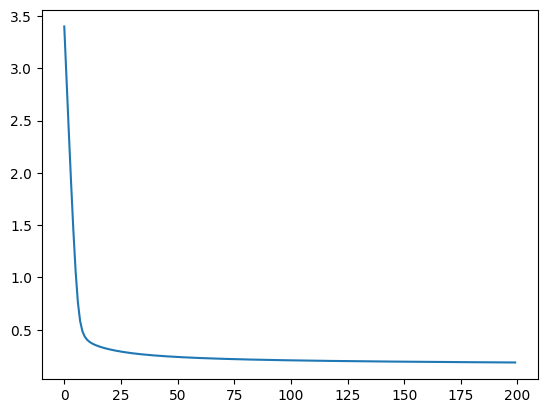

In [52]:
W, b = artificial_neuron(X, y)

In [53]:
W,b

(array([[ 1.11651485],
        [-1.36694286]]),
 array([1.64242785]))

# 4. Predict a new sample

array([False])

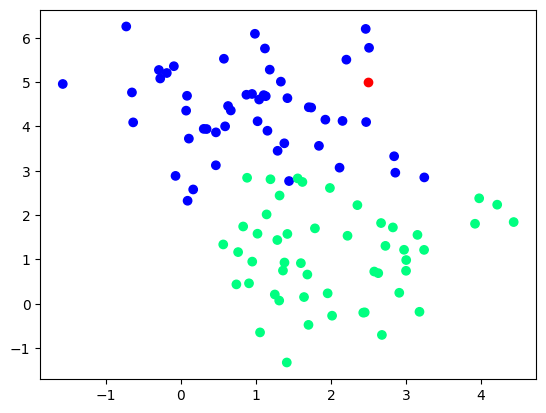

In [54]:
new_sample=np.array([2.5,5])
plt.scatter(X[:,0], X[:, 1], c=y, cmap='winter')
plt.scatter(new_sample[0], new_sample[1], c='r')
plt.show
predict(new_sample, W, b)

##Probability (1-A)

# 5. Decision frontiers

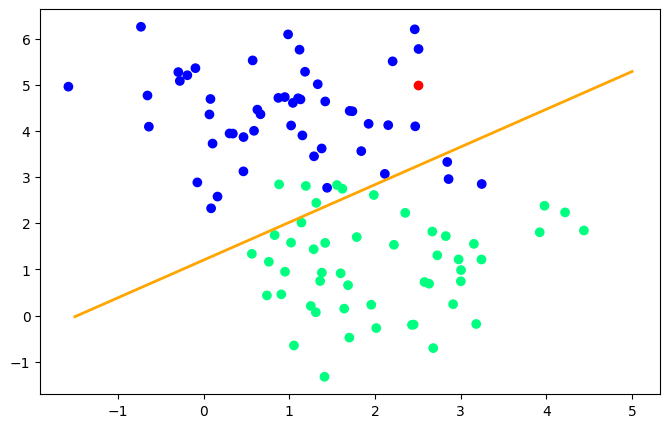

In [55]:
#Compare the errors to the Accuracy value

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='winter')
plt.scatter(new_sample[0], new_sample[1], c='r')
x1 = np.linspace(-1.5, 5, 50)
x2 = ( - W[0] * x1 - b) / W[1] #à Z=0 A=0.5

ax.plot(x1, x2, c='orange', lw=2)
